## Employee Retention Using Machine Learning

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [244]:
df=pd.read_csv('dataset.csv')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [246]:
df.shape

(14999, 10)

#### Data Cleaning

In [247]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [248]:
df.drop(columns=['empid'],inplace=True,axis=1)

In [249]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [250]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [251]:
df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [252]:
left_counts = df['left'].value_counts()

# Print the counts
print(left_counts)

left
0    11428
1     3571
Name: count, dtype: int64


### Mean imputation

In [253]:
df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)

C:\Users\vishn\AppData\Local\Temp\ipykernel_17784\1078361875.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['satisfaction_level'].fillna(df['satisfaction_level'].mean(),inplace=True)


In [254]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

### Feature Engineering

#### The salary column be labeled in rank so used label encoding

In [255]:
# Encode the 'salary' column
salary_encoder = LabelEncoder()
df['salary'] = salary_encoder.fit_transform(df['salary'])

In [256]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [284]:
df.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
10175,0.31,0.75,3,120,4,0,0,0,0
4580,0.78,0.98,4,157,3,0,0,2,0
14923,0.43,0.50,2,148,3,0,0,1,1


In [258]:
# Define features and target variable
X = df.drop('left', axis=1)
y = df['left']

In [259]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Handling Imbalanced Data using Imblearn

In [260]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

In [261]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert back to DataFrame for easy viewing
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Print the counts of each class
print(resampled_df['left'].value_counts())

left
1    11428
0    11428
Name: count, dtype: int64


In [262]:
df=resampled_df

In [263]:
df.shape

(22856, 9)

In [264]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [265]:
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming X_train is your training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [266]:
X_train,X_test

(array([[-2.06219725,  0.72148705,  2.58705966, ..., -0.41302249,
         -0.14865702, -0.55860579],
        [-0.17584079, -0.21234465,  0.15975498, ...,  2.42117564,
         -0.14865702,  1.03856256],
        [-0.89827518, -1.37963426, -1.45844814, ..., -0.41302249,
         -0.14865702, -0.55860579],
        ...,
        [ 0.18537641,  0.07947776,  0.96885654, ..., -0.41302249,
         -0.14865702,  1.03856256],
        [ 0.70713458,  1.65531874,  0.15975498, ..., -0.41302249,
         -0.14865702, -0.55860579],
        [ 1.46970421,  0.83821601, -1.45844814, ..., -0.41302249,
         -0.14865702, -0.55860579]]),
 array([[ 0.14524116,  1.42186082,  0.96885654, ...,  2.42117564,
         -0.14865702,  1.03856256],
        [ 1.06835177,  0.48802912, -0.64934658, ..., -0.41302249,
         -0.14865702, -0.55860579],
        [ 0.30578214,  1.53858978, -0.64934658, ..., -0.41302249,
         -0.14865702, -0.55860579],
        ...,
        [ 0.66699933, -1.08781186, -0.64934658, ..., -

In [267]:

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [268]:
df.shape

(22856, 9)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22856 entries, 0 to 22855
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     22856 non-null  float64
 1   last_evaluation        22856 non-null  float64
 2   number_project         22856 non-null  int64  
 3   average_montly_hours   22856 non-null  int64  
 4   time_spend_company     22856 non-null  int64  
 5   Work_accident          22856 non-null  int64  
 6   promotion_last_5years  22856 non-null  int64  
 7   salary                 22856 non-null  int32  
 8   left                   22856 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 1.5 MB


### Model Selection

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


### Grid search CV to find the best params for the model

In [271]:
# Initialize a list of models
models = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [272]:
scores =[]
for model_name, mp in models.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
    

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

### From tuning we get best score to improve accuracy

In [273]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9247978437256863,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9910661998443926,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}}]

In [274]:
#xgboost gives best result
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)

In [275]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Checking with trained data

In [278]:
new_data_point = [[0.61,0.99,5,98,2,0,0,2]]  # Creating a list of features
new_data_point_scaled = scaler.transform(new_data_point)
# Making predictions
y_pred = model_xgb.predict(new_data_point_scaled)

print("Predicted class:", y_pred[0]) 

Predicted class: 0


C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### When the training accuracy is significantly more than test accuracy then,it shows overfitting

In [279]:
# Evaluate the model
train_accuracy = model_xgb.score(X_train, y_train)
test_accuracy = model_xgb.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.99


In [280]:
model_xgb.score(X_test,y_test)


0.9864444444444445

In [281]:
X_test

array([[ 0.14524116,  1.42186082,  0.96885654, ...,  2.42117564,
        -0.14865702,  1.03856256],
       [ 1.06835177,  0.48802912, -0.64934658, ..., -0.41302249,
        -0.14865702, -0.55860579],
       [ 0.30578214,  1.53858978, -0.64934658, ..., -0.41302249,
        -0.14865702, -0.55860579],
       ...,
       [ 0.66699933, -1.08781186, -0.64934658, ..., -0.41302249,
        -0.14865702, -0.55860579],
       [ 1.26902799, -0.79598945,  0.96885654, ..., -0.41302249,
        -0.14865702,  1.03856256],
       [ 0.10510592, -0.9710829 , -0.64934658, ..., -0.41302249,
         6.72689388, -2.15577415]])

In [282]:
model_xgb.predict(X_train[:7])

array([1, 0, 1, 0, 1, 1, 0])

## save the model to pickle file

In [283]:
import pickle


# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)

print("Model saved as 'xgb_model.pkl'")

Model saved as 'xgb_model.pkl'


In [144]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[3451,   26],
       [  13, 3367]], dtype=int64)

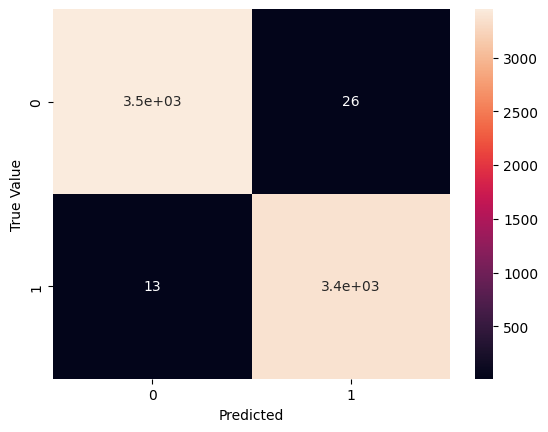

In [145]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

# KNN classifier

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to train and evaluate k-NN model for different values of k
def evaluate_knn(X_train, X_test, y_train, y_test):
    errors = []
    k_values = range(1, 31)  # You can adjust the range based on your needs

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        errors.append(1 - accuracy_score(y_test, y_pred))
    
    return k_values, errors

# Evaluate k-NN model
k_values, errors = evaluate_knn(X_train, X_test, y_train, y_test)

# Find the optimal k value
optimal_k = k_values[np.argmin(errors)]
print(f"Optimal k value: {optimal_k}")



# Train the k-NN model with the optimal k value and print its accuracy
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal k ({optimal_k}): {accuracy_optimal:.2f}")


Optimal k value: 1
Accuracy with optimal k (1): 0.98


## Elbow method to find the best K value

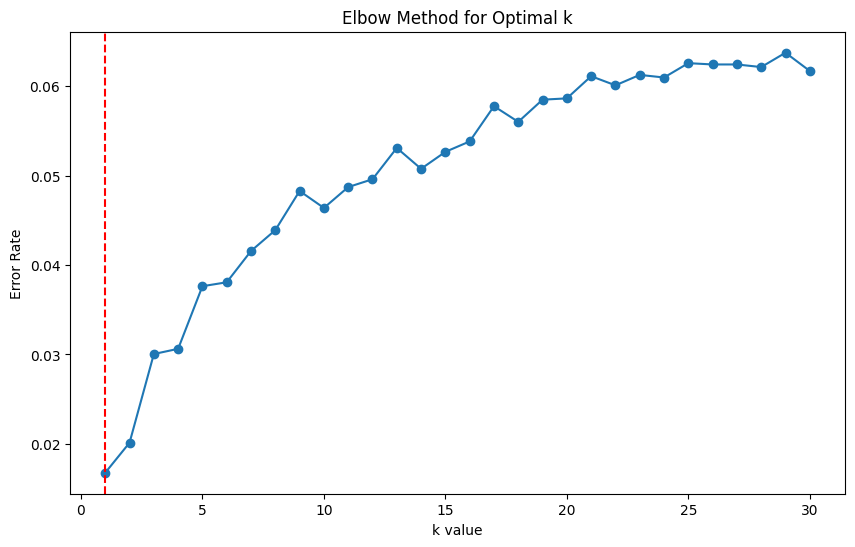

In [147]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.show()

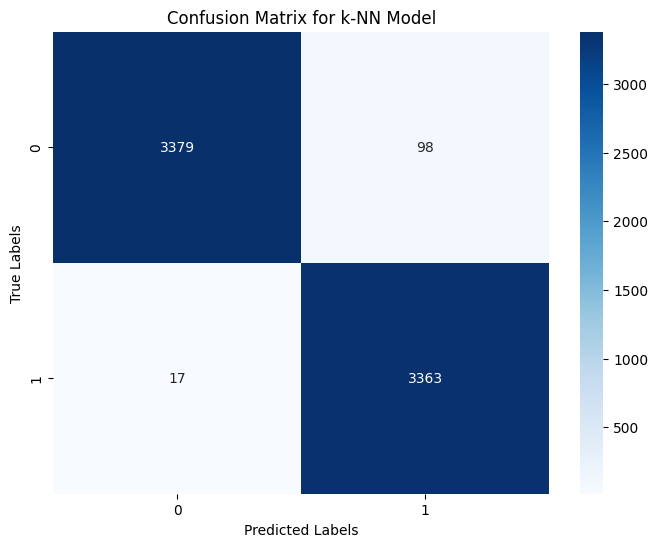

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for k-NN Model')
plt.show()